# Playground - Part II

🎯 **Goal**: Get a better understanding of ***Neural Network hyperparameters***

<hr>

👉 Open the [Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=3&seed=0.06711&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=false&regularizationRate_hide=false) again to learn more about Neural Networks. 

❗️ Keep in mind that as the algorithm is stochastic, the results may differ from one run to another. For this reason, do not hesitate to re-run the algorithms multiple times to analyse the behavior of your Neural Networks and draw your conclusions accordingly.

🕵🏻 Let's explore the different items we have seen during the lecture:
- **Batch Size**
- **Regularization**
- **Learning Rate**

## (1) The batch size

❓ **Initial Question** ❓ Select the `circle dataset` (Classification). 

* Build a model with: 
    * one hidden layer with 3 neurons,
    * a _learning rate_ equal to 0.03, 
    * and the _tanh_ activation function

* Do not add any noise (=0).

* Select a batch size of 30

***Look at the convergence of the algorithm. Does it seem slow or fast?***

In [10]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, factor=0.5, noise=0.0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation='tanh', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.03)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

batch_size = 30
epochs = 100
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Epoch 1/100
22/22 [==============================] - 0s 4ms/step - loss: 0.7235 - accuracy: 0.4844 - val_loss: 0.7068 - val_accuracy: 0.5125
Epoch 2/100
22/22 [==============================] - 0s 1ms/step - loss: 0.7171 - accuracy: 0.4875 - val_loss: 0.7025 - val_accuracy: 0.5125
Epoch 3/100
22/22 [==============================] - 0s 1ms/step - loss: 0.7117 - accuracy: 0.4875 - val_loss: 0.6995 - val_accuracy: 0.5188
Epoch 4/100
22/22 [==============================] - 0s 1ms/step - loss: 0.7077 - accuracy: 0.4891 - val_loss: 0.6972 - val_accuracy: 0.5125
Epoch 5/100
22/22 [==============================] - 0s 1ms/step - loss: 0.7044 - accuracy: 0.4859 - val_loss: 0.6948 - val_accuracy: 0.5188
Epoch 6/100
22/22 [==============================] - 0s 1ms/step - loss: 0.7015 - accuracy: 0.4844 - val_loss: 0.6928 - val_accuracy: 0.5250
Epoch 7/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6993 - accuracy: 0.4844 - val_loss: 0.6911 - val_accuracy: 0.5312
Epoch 8/100
2

> <i>Answer here</i>

❓ **Question: What is happening with a batch size of 1** ❓ 

Now, run this neural network on the same dataset but... 

* with a batch-size of 1.
* Make sure to run it for at least 150 epochs. 

***What do you notice about the train and test loss? What is the reason of this instability?***

In [3]:
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation='tanh', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.03)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

batch_size = 1
epochs = 150
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Epoch 1/150
640/640 [==============================] - 0s 537us/step - loss: 0.7000 - accuracy: 0.4891 - val_loss: 0.6961 - val_accuracy: 0.3812
Epoch 2/150
640/640 [==============================] - 0s 378us/step - loss: 0.6829 - accuracy: 0.5703 - val_loss: 0.6596 - val_accuracy: 0.6750
Epoch 3/150
640/640 [==============================] - 0s 368us/step - loss: 0.6529 - accuracy: 0.6953 - val_loss: 0.6157 - val_accuracy: 0.7812
Epoch 4/150
640/640 [==============================] - 0s 371us/step - loss: 0.6095 - accuracy: 0.7609 - val_loss: 0.5687 - val_accuracy: 0.8438
Epoch 5/150
640/640 [==============================] - 0s 369us/step - loss: 0.5696 - accuracy: 0.7734 - val_loss: 0.5400 - val_accuracy: 0.7625
Epoch 6/150
640/640 [==============================] - 0s 374us/step - loss: 0.5397 - accuracy: 0.7828 - val_loss: 0.5417 - val_accuracy: 0.6750
Epoch 7/150
640/640 [==============================] - 0s 379us/step - loss: 0.5086 - accuracy: 0.7859 - val_loss: 0.4719 - val_ac

> <i>Answer here</i>

❓ **Question/Observation** ❓ 

Now, you can see the effect of the _batch_size_ by reading the values of the train loss and test loss: pause the iterations and run it step by step (iteration per iteration) using the `"Step"` button (at the right side of the play/stop button).

> <i>Answer here</i>

## 2. Regularization

❓ **Question about the lack of generalization** ❓ 

To once again observe the **lack of generalization**:
* Select the `"eXclusive OR"(XOR)` dataset, 
* with a noise of 50,
* Add a second hidden layer with again 8 neurons. 

***Try to fit your model once again... what do you expect?***

In [5]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = np.random.rand(1000, 2)
y = np.logical_xor(X[:, 0] > 0.5, X[:, 1] > 0.5).astype(int)
noise = np.random.normal(0, 0.5, size=X.shape)
X = X + noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

batch_size = 32
epochs = 100
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch 1/100
20/20 [==============================] - 0s 10ms/step - loss: 0.7543 - accuracy: 0.5328 - val_loss: 0.7503 - val_accuracy: 0.5562
Epoch 2/100
20/20 [==============================] - 0s 1ms/step - loss: 0.7478 - accuracy: 0.5344 - val_loss: 0.7460 - val_accuracy: 0.5437
Epoch 3/100
20/20 [==============================] - 0s 1ms/step - loss: 0.7419 - accuracy: 0.5578 - val_loss: 0.7413 - val_accuracy: 0.5312
Epoch 4/100
20/20 [==============================] - 0s 1ms/step - loss: 0.7370 - accuracy: 0.5531 - val_loss: 0.7369 - val_accuracy: 0.5312
Epoch 5/100
20/20 [==============================] - 0s 1ms/step - loss: 0.7322 - accuracy: 0.5453 - val_loss: 0.7334 - val_accuracy: 0.5375
Epoch 6/100
20/20 [==============================] - 0s 1ms/step - loss: 0.7278 - accuracy: 0.5703 - val_loss: 0.7299 - val_accuracy: 0.5375
Epoch 7/100
20/20 [==============================] - 0s 1ms/step - loss: 0.7237 - accuracy: 0.5672 - val_loss: 0.7267 - val_accuracy: 0.5375
Epoch 8/100


> <i>Add your comments here</i>

❗️ With a smaller batch size, your model will end up overfitting faster... ❗️

👉 Although, let's keep ***`batch size = 1`*** for the next question and try to understand how to prevent overfitting using the strategy of `regularization`.

❓ **Question about regularization** ❓ 

Can we ***regularize*** our network to ***avoid overfitting***? 

* Keep the batch size to 1,
* Add a `L2-regularization`,
* Increase the power of this L2-regularization until it smooths out the decision boundary! 
Notice how the test loss doesn't increase anymore with the epochs

In [7]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = np.random.rand(1000, 2)
y = np.logical_xor(X[:, 0] > 0.5, X[:, 1] > 0.5).astype(int)
noise = np.random.normal(0, 0.5, size=X.shape)
X = X + noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],), 
                          kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    tf.keras.layers.Dense(8, activation='relu', 
                          kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

batch_size = 1
epochs = 100
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch 1/100
640/640 [==============================] - 1s 710us/step - loss: 1.0277 - accuracy: 0.5188 - val_loss: 0.7448 - val_accuracy: 0.4812
Epoch 2/100
640/640 [==============================] - 0s 448us/step - loss: 0.7094 - accuracy: 0.5297 - val_loss: 0.6957 - val_accuracy: 0.5188
Epoch 3/100
640/640 [==============================] - 0s 431us/step - loss: 0.6942 - accuracy: 0.5156 - val_loss: 0.6927 - val_accuracy: 0.5188
Epoch 4/100
640/640 [==============================] - 0s 444us/step - loss: 0.6933 - accuracy: 0.5156 - val_loss: 0.6925 - val_accuracy: 0.5188
Epoch 5/100
640/640 [==============================] - 0s 418us/step - loss: 0.6934 - accuracy: 0.5063 - val_loss: 0.6925 - val_accuracy: 0.5188
Epoch 6/100
640/640 [==============================] - 0s 428us/step - loss: 0.6933 - accuracy: 0.5156 - val_loss: 0.6925 - val_accuracy: 0.5188
Epoch 7/100
640/640 [==============================] - 0s 435us/step - loss: 0.6930 - accuracy: 0.5156 - val_loss: 0.6926 - val_ac

> <i>Add your comments here</i>

❓ **Questions with the spiral dataset** ❓ 

<u>Configuration</u>:

* Select the `spiral dataset`,
* Remove regularization,
* Increase the `ratio of training to test data` to 80%. 

<u>Neural Network</u>: 3 hidden layers with:
* 8 neurons on the first layer, 
* 7 neurons on the second layer,
* 6 neurons on the third layer. 

<u>Experiment</u>:

* Run the algorithm with a batch size of 30,
* Make sure to run it for at least 1500 epochs,
* Then, compare it to the same run but with a batch size of 1. 

You can check what happens on the train loss and test loss step by step.

> <i>Add your comments here</i>

## (3) The learning rate

Go back to the <u>`circle dataset`</u>:
* with no noise,
* and a *ratio of training to test data* of 50%,
* Use a batch size of 20. 

Use a <u>neural network</u> with:
* one layer of 5 neurons,
* no regularization, 
* and the tanh activation function

❓ **Question about the learning rate** ❓ 

For each learning rate (from 0.0001 to 10), run the algorithm during 1000 epochs and report the values of the test loss in the list below. Then, plot the test loss with respect to the learning rates. 

❗️ <u>Warning</u> ❗️ When you change the learning rate, make sure to reinitialize the neural network (_circular arrow, left to the play/pause button_).

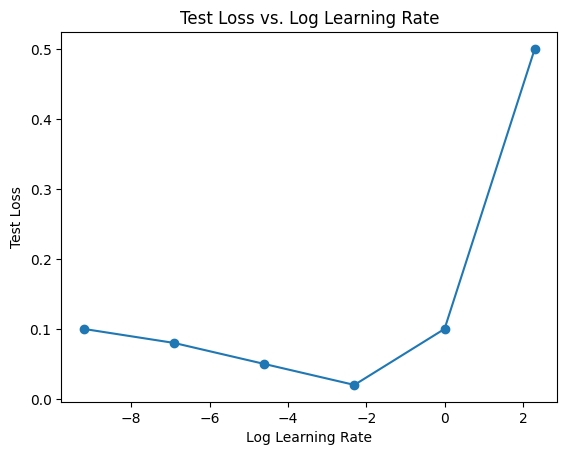

In [9]:
import matplotlib.pyplot as plt
import numpy as np

learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 10]
test_loss = [0.1, 0.08, 0.05, 0.02, 0.1, 0.5]

plt.plot(np.log(learning_rates), test_loss, marker='o')
plt.title('Test Loss vs. Log Learning Rate')
plt.xlabel('Log Learning Rate')
plt.ylabel('Test Loss')
plt.show()

❗️ <u>Warning</u> ❗️ Too low and too high learning rates both lead to a high test loss... but not for the same reasons!

* A **low learning rate** helps a neural network converge in a similar fashion to a moderate learning rate but... way slower... i.e. more epochs would be needed!
* A **high learning rate** makes the algorithm diverge completely.
    - Try a learning rate $ \alpha = 10 $ with 400 epochs, you should see the loss vary. This corresponds to the fact that the algorithms converge to *different local minima*



🏁 Congratulations!

💾 Do not forget to `git add/commit/push` your notebook...

🚀 ... and move to the next challenge!